# Gradients

The [gradient of a function](https://en.wikipedia.org/wiki/Gradient) is a multivariate derivate with a crucial property -- the gradient points in the direction of the greatest rate of increase of the function. Many physical processes can be modeled by gradient and gradient flows, such as the flow of water down a mountain and the movement of charged particles in electromagnetic potentials.

As data scientists we use gradient descent to maximize or minimize various functions. For example, to find a good model fit we could attempt to minimize a loss function by following the gradient through many iterations in parameter-space. In particular, gradient descent can be used for [linear regression](https://en.wikipedia.org/wiki/Gradient_descent#Solution_of_a_linear_system). Let's take a close look.

If we want to minimize a multivariate function $f(\mathbf{a})$ -- typically a function of our parameters $\mathbf{a} = (a_1, \ldots, a_n)$ computed on our dataset -- we start with a guess $\mathbf{a}_1$ and compute the next step using the gradient, denoted by $\nabla f$:

$$ \mathbf{a}_2 = \mathbf{a}_1 - \lambda \nabla f(\mathbf{a}_1)$$

Note the differences in notation carefully -- bold face indicates a vector of parameters. The variable $\lambda$ is a parameter that controls the step size and is sometimes called the _learning rate_. Essentially we are taking a local linear approximation to our function, stepping a small bit in the direction of greatest change, and computing a new linear approximation to the function. We repeat the process until we converge to a minimum:

$$ \mathbf{a}_{n+1} = \mathbf{a}_n - \lambda \nabla f(\mathbf{a}_n)$$

This is the _gradient descent_ algorithm. It is used for a variety of machine learning models including some that you will learn about soon, such as logistic regression, support vector machines, and neural networks.

![](https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png)


In [1]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model
import math
# import seaborn as ss

## Some helper functions
The following functions will generate data and polynomial values.

In [2]:
def func_x(x):
    return x**2

def gradient_x(x):
    return 2*x

def gradient_descent_x(gradient, x, alpha=0.1, max_steps=1000):    
    path_gradient = []
    
    for step in range(max_steps):
        
        g = gradient(x)
        path_gradient.append((x,g))
        
        x -= alpha*g
        
        
        if abs(alpha*g) < 0.001:
            break

    return path_gradient

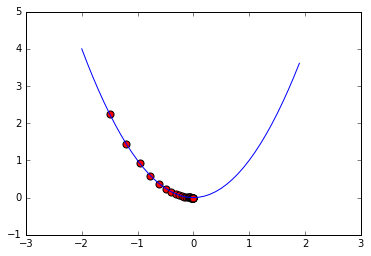

In [3]:
xs = np.arange(-2, 2, 0.1)
ys = map(func_x, xs)

plt.plot(xs, ys)

# Start gradient descent at x = -1.5
path_gradient = gradient_descent_x(gradient_x, x=-1.5, alpha=0.1, max_steps=1000)
x_path, g_path = zip(*path_gradient)
y_path = map(func_x, x_path)
plt.scatter(x_path, y_path, c='r', s=50)

## Independent Practice

Here is a [nice example](http://math.stackexchange.com/questions/770622/gradient-descent-algorithm-always-converges-to-the-closest-local-optima) of when gradient descent fails. Let's implement these functions and see that gradient descent gets stuck.

The function is:
$$f(x, y) = \begin{cases}
2 x^2 & \quad \text{if $x \leq 1$}\\
2  & \quad \text{else}
\end{cases}$$

Walk throught the following code samples.

In [4]:
def func_x(x):
    if x <= 1:
        return 2 * x ** 2
    return 2

def gradient_x(x):
    if x <= 1:
        return 4 * x
    return 0

def gradient_descent_x(gradient, x, alpha=0.1, max_steps=1000):    
    path_gradient = []
    
    for step in range(max_steps):
        
        g = gradient(x)
        path_gradient.append((x,g))
        
        x -= alpha*g
        
        if abs(alpha*g) < 0.00001:
            break

    return path_gradient

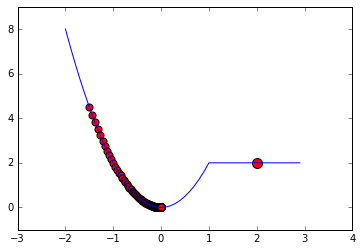

In [5]:
xs = np.arange(-2, 3, 0.1)
ys = map(func_x, xs)

plt.plot(xs, ys)

# Start gradient descent at x = -1.5
path_gradient = gradient_descent_x(gradient_x, alpha=0.01, x=-1.5)
x_path, g_path = zip(*path_gradient)
y_path = map(func_x, x_path)
plt.scatter(x_path, y_path, c='r', s=50)

# # Start gradient descent at x = 2.0
path_gradient = gradient_descent_x(gradient_x, alpha=0.01, x=2.0)
x_path, g_path = zip(*path_gradient)
y_path = map(func_x, x_path)
plt.scatter(x_path, y_path, c='r', s=100)

Gradient descent works on the left half of the function but not on the right portion because the derivative is flat. Our starting point of $x=2$ never moves and doesn't converge to the center.

### Exercise

Similarly, use the function $f(x) = x^4 - 2 x^2 + x +1$ and apply gradient descent. If you need help with the derivative, you can use [Wolfram Alpha](http://www.wolframalpha.com/calculators/derivative-calculator/).

Steps:
* Plot the function and identify the two minima
* Compute the derivative
* Using gradient descent, find two starting points that converge to different minima. You may need to alter the learning rate.

Questions:
* What does this tell you about the end result of gradient descent?
* What are the implications for putting gradient descent into practice?

> The learning rate and starting point affects the end popint. We can't be sure that gradient descent converges to a global minimum.

In [6]:
# Solution

def func_x(x):
    return x**4 - 2*x**2 + x + 1

def gradient_x(x):
    return 4 * x**3 - 4*x + 1

def gradient_descent_x(gradient, x, alpha=0.1, max_steps=1000):    
    path_gradient = []
    
    for step in range(max_steps):
        
        g = gradient(x)
        path_gradient.append((x,g))
        
        x -= alpha*g
        
        if abs(alpha*g) < 0.00001:
            break

    return path_gradient

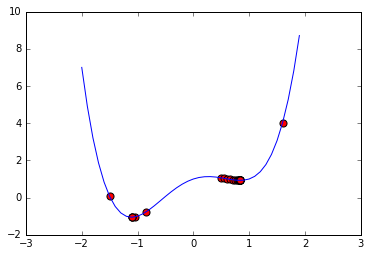

In [7]:
xs = np.arange(-2, 2, 0.1)
ys = map(func_x, xs)

plt.plot(xs, ys)

# Start gradient descent at x = -1.5
path_gradient = gradient_descent_x(gradient_x, x=-1.5, alpha=0.1, max_steps=1000)
x_path, g_path = zip(*path_gradient)
y_path = map(func_x, x_path)
plt.scatter(x_path, y_path, c='r', s=50)

# Start gradient descent at x = 2
path_gradient = gradient_descent_x(gradient_x, x=1.6, alpha=0.1, max_steps=1000)
x_path, g_path = zip(*path_gradient)
y_path = map(func_x, x_path)
plt.scatter(x_path, y_path, c='r', s=50)

### Bonus Exercise

Use gradient descent to find the minimum of the function
$$f(x, y) = - e^{-x^2 - 4y^2}$$

Answer: $(x, y) = (0, 0)$.

In [8]:
# Solution

def func_xy(x):
    return - math.exp(-x**2-4*y**2)

def gradient_xy_x(x, y):
    return 2*x * np.exp(-x**2-4*y**2)
def gradient_xy_y(x, y):
    return 8*y * np.exp(-x**2-4*y**2)

def gradient_descent_xy_xy(gradient_xy_x, gradient_xy_y, x, y, alpha=0.1, max_steps=1000):    
    path_gradient = []
    
    for step in range(max_steps):
        
        gx = gradient_xy_x(x, y)
        gy = gradient_xy_y(x, y)        

        path_gradient.append((x,y,gx,gy))
        
        x -= alpha*gx
        y -= alpha*gy
        
        if abs(alpha*gx) < 0.001 and abs(alpha*gy) < 0.000001:
            break

    return path_gradient


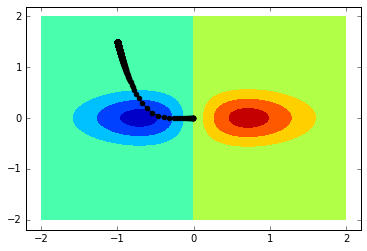

In [9]:
delta = 0.01
x = y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = gradient_xy_x(X, Y)
CS = plt.contourf(X, Y, Z)

xs, ys = -1, 1.5

path_gradient = gradient_descent_xy_xy(gradient_xy_x, gradient_xy_y, xs, ys, alpha=0.1, max_steps=100000000)

x_path, y_path, gx_path, gy_path = zip(*path_gradient)

plt.scatter(x_path, y_path, color="black")
plt.plot(x_path, y_path, color="black")
plt.show()